**Name :** Akshay Parate  
**CWID :** 20032008  
**Assignment Number/Name :** 02/EDA  
**Brief of the task :** Perform EDA of breast cancer wisconsin dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 1) Load the “breast-cancer-wisconsin.data.csv

In [2]:
breast_cancer_df = pd.read_csv("./breast-cancer-wisconsin.csv")

In [3]:
breast_cancer_df.head()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
# Column types
for column in list(breast_cancer_df.columns):
    print("{} : {}".format(column,type(breast_cancer_df[column][0])))

Sample : <class 'numpy.int64'>
F1 : <class 'numpy.int64'>
F2 : <class 'numpy.int64'>
F3 : <class 'numpy.int64'>
F4 : <class 'numpy.int64'>
F5 : <class 'numpy.int64'>
F6 : <class 'str'>
F7 : <class 'numpy.int64'>
F8 : <class 'numpy.int64'>
F9 : <class 'numpy.int64'>
Class : <class 'numpy.int64'>


##### Since column F6 datatype is string, we will change it to numeric

In [5]:
# coerce the ? to missing
breast_cancer_df["F6"] = pd.to_numeric(breast_cancer_df["F6"], errors='coerce')

In [6]:
for column in list(breast_cancer_df.columns):
    print("{} : {}".format(column,type(breast_cancer_df[column][0])))

Sample : <class 'numpy.int64'>
F1 : <class 'numpy.int64'>
F2 : <class 'numpy.int64'>
F3 : <class 'numpy.int64'>
F4 : <class 'numpy.int64'>
F5 : <class 'numpy.int64'>
F6 : <class 'numpy.float64'>
F7 : <class 'numpy.int64'>
F8 : <class 'numpy.int64'>
F9 : <class 'numpy.int64'>
Class : <class 'numpy.int64'>


### I. Summarizing each column (e.g. min, max, mean )

In [7]:
breast_cancer_df.describe()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
print('\n min, max, mean only')
Min_Max_Mean=breast_cancer_df.describe(include=[float, int]).loc[["min", "max", "mean"]]
Min_Max_Mean


 min, max, mean only


,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
min,6.163400e+04,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,1.345435e+07,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000
mean,1.071704e+06,4.41774,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557


### II. Identifying missing values

In [9]:
breast_cancer_df.isnull().sum()

Sample     0
F1         0
F2         0
F3         0
F4         0
F5         0
F6        16
F7         0
F8         0
F9         0
Class      0
dtype: int64

<Axes: >

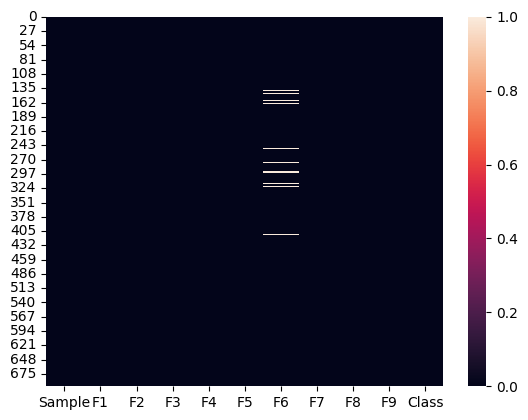

In [10]:
sns.heatmap(breast_cancer_df.isnull())

##### There are 16 missing values in the dataset

### III. Replacing the missing values with the “mean” of the column

In [11]:
breast_cancer_df['F6'].fillna(breast_cancer_df['F6'].mean(),inplace=True)
breast_cancer_df.isnull().sum()

Sample    0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
Class     0
dtype: int64

### IV. Displaying the frequency table of “Class” vs. F6

In [12]:
freq_table = pd.crosstab(breast_cancer_df['Class'], breast_cancer_df['F6'])
freq_table

F6,1.000000,2.000000,3.000000,3.544656,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000
Class,,,,,,,,,,,
2,387,21,14,14,6,10,0,1,2,0,3
4,15,9,14,2,13,20,4,7,19,9,129


### V. Displaying the scatter plot of F1 to F6, one pair at a time

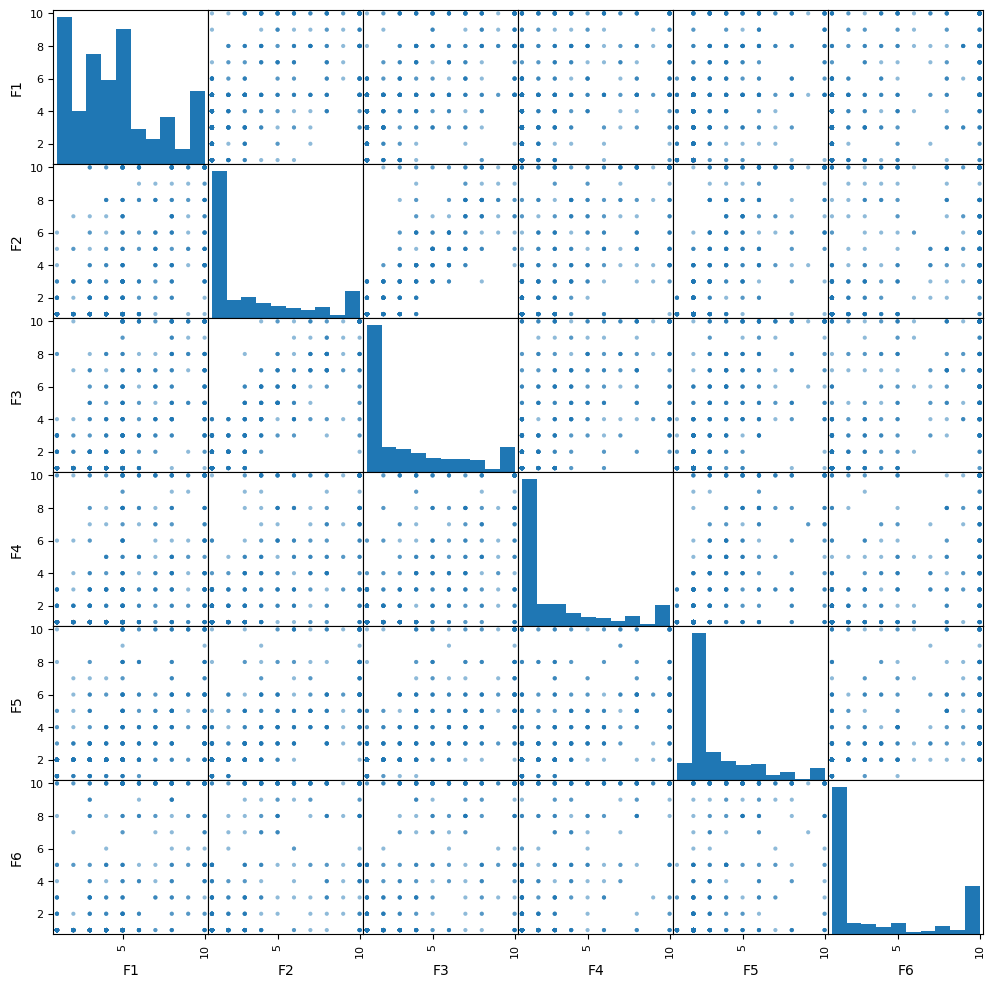

In [16]:
pd.plotting.scatter_matrix(breast_cancer_df.loc[:, 'F1':'F6'], figsize=(12,12), diagonal='hist')
plt.show()

### V. Show histogram box plot for columns F7 to F9

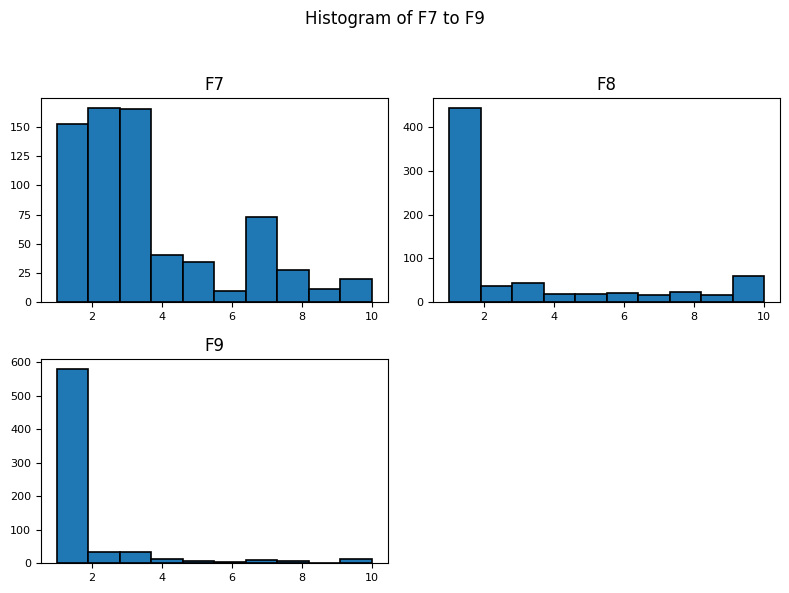

In [14]:
# Select columns 
subset = breast_cancer_df.loc[:, 'F7':'F9']

# Create a histogram
subset.hist(grid=False, bins=10, edgecolor="black", linewidth=1.2, xlabelsize=8, ylabelsize=8, figsize=(8, 6))
plt.suptitle("Histogram of F7 to F9", fontsize=12)
plt.tight_layout(rect=(0,0,1,0.95))
plt.show()

# 2. Delete all the objects from your R/Python- environment. Reload the “breast-cancer-wisconsin.data.csv” from canvas into R/Python. Remove any row with a missing value in any of the columns.


In [2]:
breast_cancer_df = pd.read_csv("./breast-cancer-wisconsin.csv")
breast_cancer_df["F6"] = pd.to_numeric(breast_cancer_df["F6"], errors='coerce')
print(breast_cancer_df.shape)
print(breast_cancer_df.isnull().sum())
print()
breast_cancer_df.dropna(inplace=True)
print(f"shape : {breast_cancer_df.shape}")
print(breast_cancer_df.isnull().sum())

(699, 11)
Sample     0
F1         0
F2         0
F3         0
F4         0
F5         0
F6        16
F7         0
F8         0
F9         0
Class      0
dtype: int64

shape : (683, 11)
Sample    0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
Class     0
dtype: int64
